# ISLR Chapter 3 Applied Exercises
## Excercise №9, p. 129
This question involves the use of multiple linear regression on the `Auto` data set.
1. Produce a scatterplot matrix which includes all of the variables in the data set.
2. Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.
3. Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results.  
Comment on the output. For instance:
* Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
* Which predictors appear to have a statistically significant relationship to the response?
* What does the coefficient for the `year` variable suggest?
4. Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit.
* Do the residual plots suggest any unusually large outliers?
* Does the leverage plot identify any observations with unusually high leverage?
5. Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?
6. Try a few different transformations of the variables, such as `log(X)`, `√X`, `X2`. Comment on your findings.

In [220]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import OLSInfluence

In [221]:
Auto = load_data('Auto')
Auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


### Build a scatterplot matrix
Produce a `scatterplot matrix` which includes all of the variables in the data set.

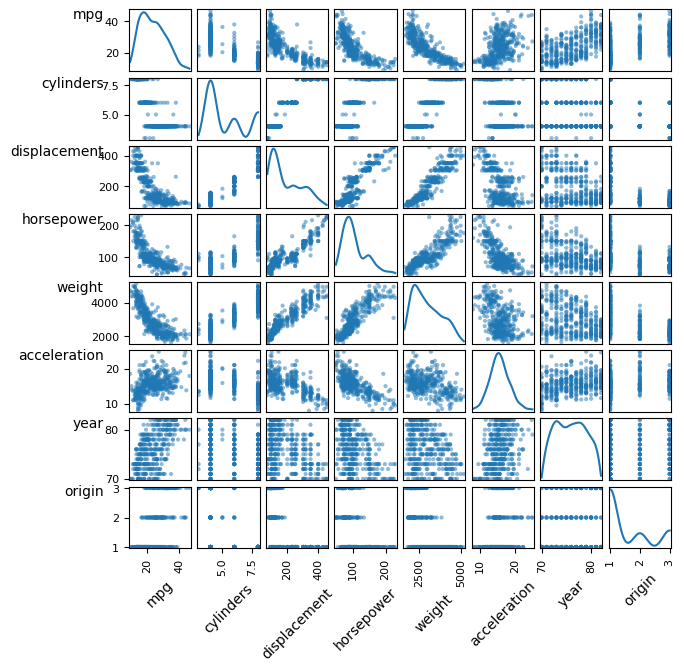

In [222]:
# visualize all of the pairwise relationships between the columns in a data frame.
scatterplot = scatter_matrix(Auto, figsize=(7, 7), diagonal='kde', alpha=0.5)

# adjust labels for better readability
for ax in scatterplot.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)    
    ax.yaxis.set_label_coords(-0.4, 0.8)
    ax.yaxis.label.set_ha('right')

plt.subplots_adjust(wspace=0.1, hspace=0.1)  # adjust horizontal and vertical spacing
plt.show()

### Computing correlation matrix
Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [223]:
Auto.corr().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


### Performing multiple regression
Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. 

In [224]:
terms = Auto.columns.drop('mpg') 
X = MS(terms).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
#summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.04e-139
Time:                        14:00:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can confidently say that `year` has a correlation with `mpg`. That is, newer cars have better mileage per gallon. Specifically, a newer car has 0.75 ± 0.05 better mileage compared to a car one year older. For each `1` year increase a car has a 0.75 ± 0.05 worse mileage.

### Diagnostoc plots
Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit.

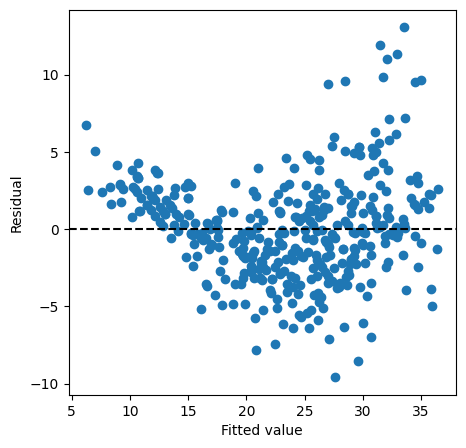

In [225]:
# Residuals vs. Fitted
ax = subplots(figsize=(5,5))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); # add a horizontal line at 0 for reference, indicating it should be black (c='k') and have a dashed linestyle (ls='--').

On the basis of the residual plot, there is some evidence of non-linearity. 

13

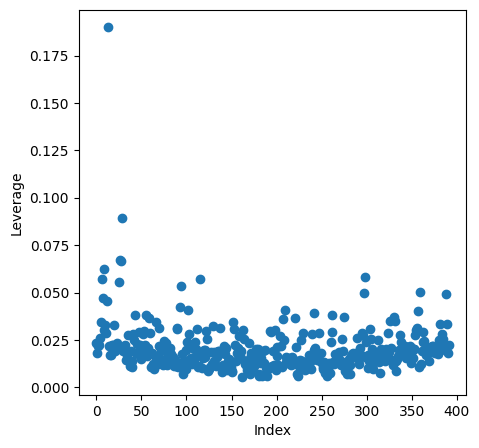

In [226]:
# Leverage statistics computed using the hat_matrix_diag attribute of the value returned by the get_influence() method
infl = results.get_influence()
ax = subplots(figsize=(5,5))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# The np.argmax() identifies the index of the largest element of an array, optionally computed over an axis of the array. 
# In this case, we maximized over the entire array to determine which observation has the largest leverage statistic.
np.argmax(infl.hat_matrix_diag) 


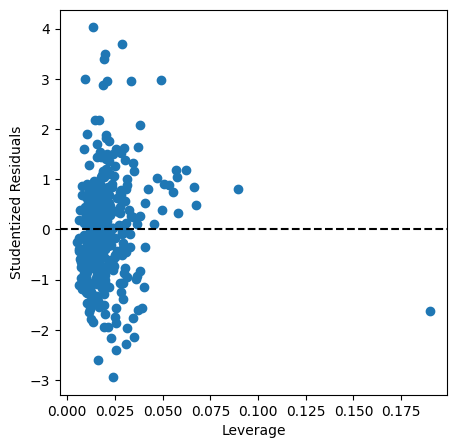

In [227]:
studentized_residuals = OLSInfluence(results).resid_studentized_external
ax = subplots(figsize=(5,5))[1]
ax.scatter(infl.hat_matrix_diag, studentized_residuals)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')
ax.axhline(0, c='k', ls='--')

Plot of the `studentized residuals` versus `leverage` for the data. Observation 13 stands out as having a very high leverage statistic but low studentized residual.

### Interaction models
Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [228]:
X = MS(['horsepower',
        'year',
        ('horsepower', 'year')]).fit_transform(Auto)
model_horsepower_year = sm.OLS(y, X).fit()
summarize(model_horsepower_year)

,coef,std err,t,P>|t|
intercept,-126.6089,12.117,-10.449,0.0
horsepower,1.0457,0.115,9.063,0.0
year,2.1920,0.161,13.585,0.0
horsepower:year,-0.0160,0.002,-10.217,0.0


In [229]:
print(f'R-squared: {model_horsepower_year.rsquared}')

R-squared: 0.7521682867976962


In [230]:
X = MS(['horsepower',
        'cylinders',
        ('horsepower', 'cylinders')]).fit_transform(Auto)
model_horsepower_cylinders = sm.OLS(y, X).fit()
summarize(model_horsepower_cylinders)

,coef,std err,t,P>|t|
intercept,72.8151,3.071,23.708,0.0
horsepower,-0.4160,0.035,-12.051,0.0
cylinders,-6.4925,0.511,-12.716,0.0
horsepower:cylinders,0.0472,0.005,9.984,0.0


In [231]:
print(f'R-squared: {model_horsepower_cylinders.rsquared}')

R-squared: 0.72701975654891


In [232]:
X = MS(['horsepower',
        'displacement',
        ('horsepower', 'displacement')]).fit_transform(Auto)
model_horsepower_displacement = sm.OLS(y, X).fit()
summarize(model_horsepower_displacement)

,coef,std err,t,P>|t|
intercept,53.0511,1.526000,34.765,0.0
horsepower,-0.2343,0.020000,-11.960,0.0
displacement,-0.0980,0.007000,-14.674,0.0
horsepower:displacement,0.0006,0.000052,11.222,0.0


In [233]:
print(f'R-squared: {model_horsepower_displacement.rsquared}')

R-squared: 0.7465843639484144


### Non-linear Transformations of the Predictors
Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [234]:
X = MS({poly('horsepower', degree=2)}).fit_transform(Auto) # quadratic
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.130,0.0
"poly(horsepower, degree=2)[0]",-120.1377,4.374,-27.467,0.0
"poly(horsepower, degree=2)[1]",44.0895,4.374,10.080,0.0


In [235]:
Auto['horsepower_sqrt'] = Auto['horsepower'] ** 0.5  # square root transformation
X = MS({'horsepower_sqrt'}).fit_transform(Auto)
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,58.7052,1.349,43.516,0.0
horsepower_sqrt,-3.5035,0.132,-26.544,0.0


In [236]:
Auto['horsepower_log'] = np.log(Auto['horsepower'])  # natural log transformation
X = MS({'horsepower_log'}).fit_transform(Auto)
model5 = sm.OLS(y, X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,108.6997,3.050,35.644,0.0
horsepower_log,-18.5822,0.663,-28.034,0.0


In [237]:
anova_lm(results, results3, results4, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,389.0,7442.029412,-5.0,-3189.816881,31.494665,NaN
2,390.0,8486.622023,-1.0,-1044.592611,51.568939,NaN
3,390.0,7899.932087,-0.0,586.689936,-inf,NaN
